In [1]:
import acquire as a

import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import sys
import os

home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
import acquire_utils

Using your store items data:

1. Convert date column to datetime format.

In [2]:
sql = '''SELECT *
         FROM sales
             JOIN items USING (item_id)
             JOIN stores USING (store_id);'''

In [3]:
# sales = pd.read_sql(sql, acquire_utils.get_connection('tsa_item_demand'))
# sales.to_csv('data/store_data.csv', index=False)
sales = pd.read_csv('data/store_data.csv')

In [4]:
# Check data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   store_id       913000 non-null  int64  
 2   item_id        913000 non-null  int64  
 3   sale_id        913000 non-null  int64  
 4   sale_amount    913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item_upc12     913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [5]:
# convert date to datetime
sales['sale_date'] = sales['sale_date'].astype('datetime64')

2. Plot the distribution of sale_amount and item_price.

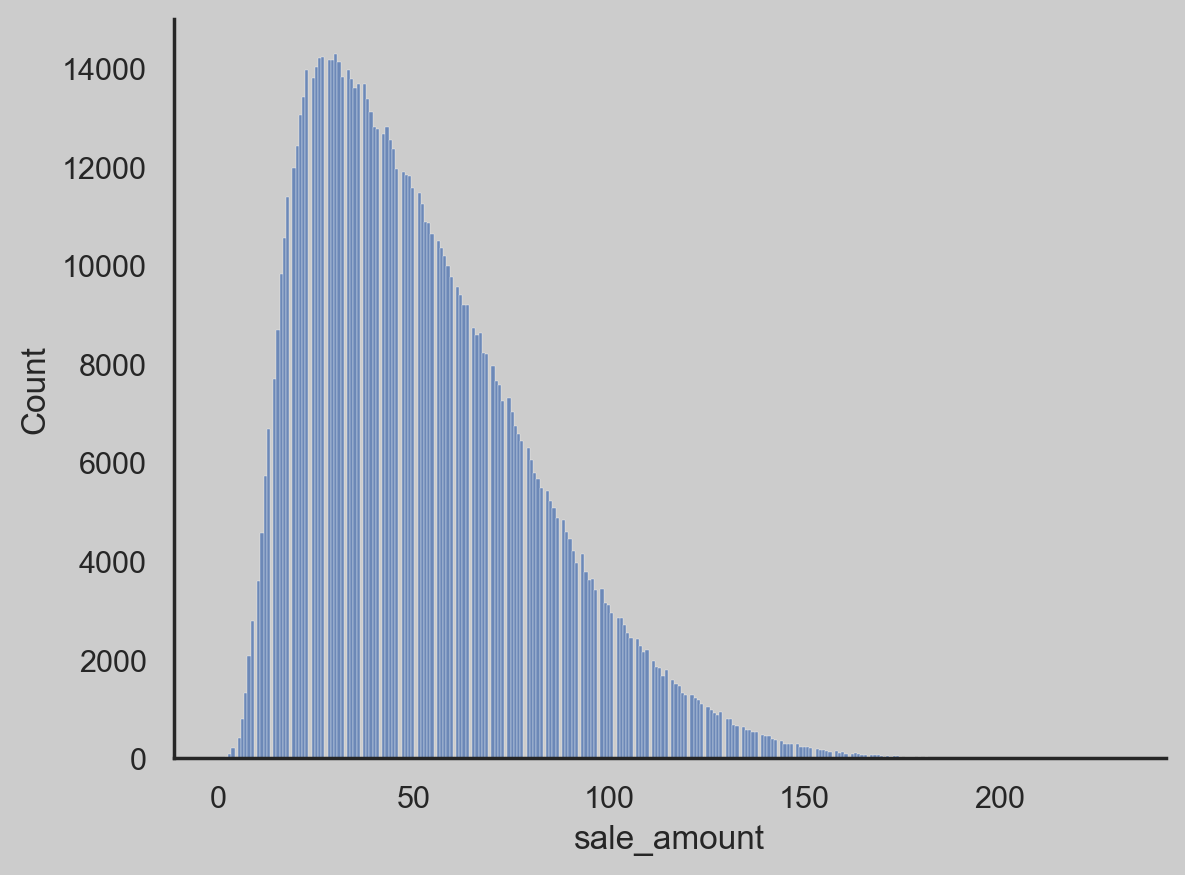

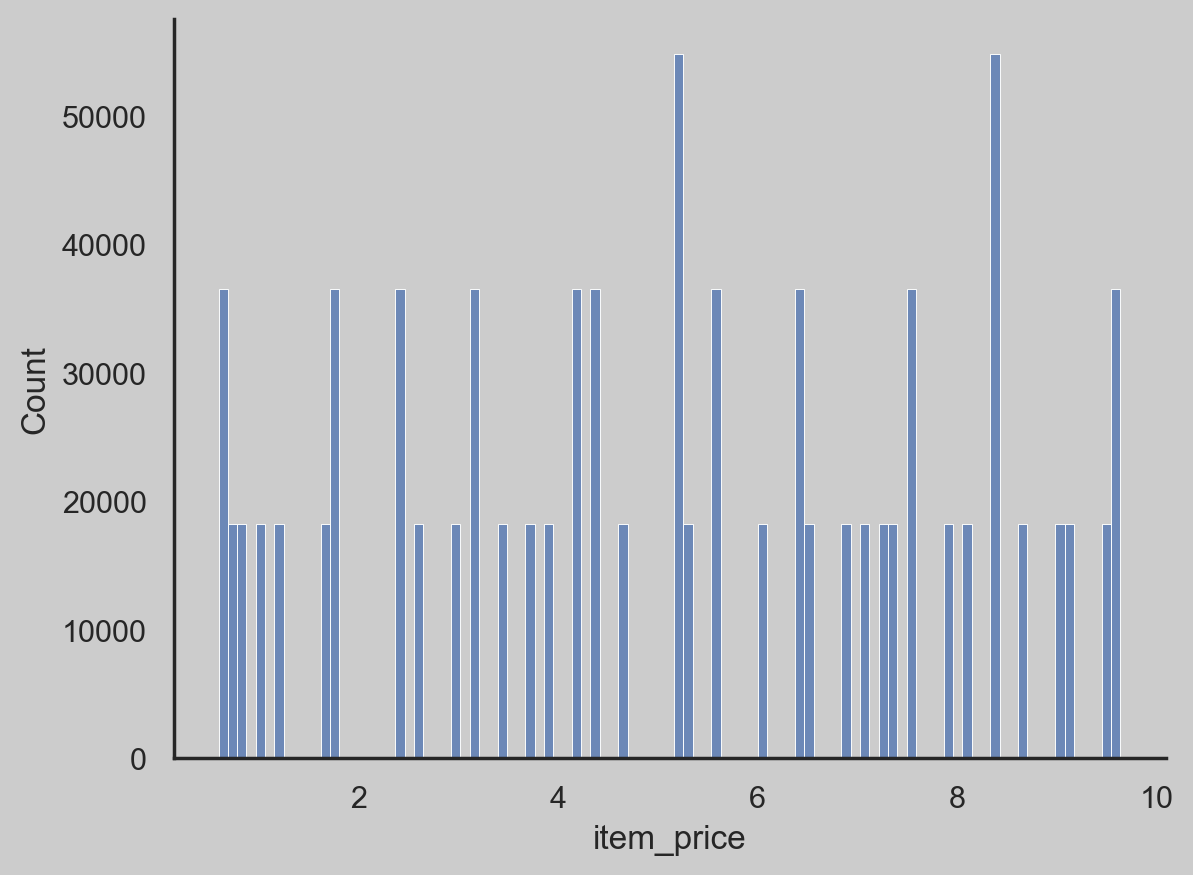

In [57]:
for col in ['sale_amount', 'item_price']:
    # Create a figure
    fig, ax = plt.subplots()

    # Set the background color of the figure
    fig.set_facecolor('#CCCCCC') 
    sns.histplot(sales[col])
    ax.patch.set_facecolor('#CCCCCC')
    sns.despine()
    plt.show()

3. Set the index to be the datetime variable.

In [7]:
sales = sales.set_index('sale_date').sort_index()

4. Add a 'month' and 'day of week' column to your dataframe.

In [8]:
sales['month'] = sales.index.month
sales['day_of_week'] = sales.index.weekday
sales.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1
2013-01-01,3,17,295813,26,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1
2013-01-01,10,7,125995,32,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,1,1
2013-01-01,3,18,314073,45,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1
2013-01-01,3,19,332333,34,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1


5. Add a column to your dataframe, sales_total, which is derived from sale_amount (total items) and item_price.

In [9]:
sales['sales_total'] = sales['sale_amount'] * sales['item_price']
sales.head(3)

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-01,3,17,295813,26,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,30.16
2013-01-01,10,7,125995,32,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,1,1,308.48


In [10]:
expected_range = pd.date_range(start=sales.index.min(), end=sales.index.max())
expected_range.difference(sales.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results

In [11]:
def prep_sales():
    
    # acquire data
    # if file doesn't exist, cache it
    filepath = 'data/store_data.csv'
    if not os.path.isfile(filepath):
        sql = '''SELECT *
                 FROM sales
                     JOIN items USING (item_id)
                     JOIN stores USING (store_id);'''
        sales = pd.read_sql(sql, acquire_utils.get_connection('tsa_item_demand'))
        sales.to_csv(filepath, index=False)
    
    sales = pd.read_csv(filepath)
    
    # convert date column to datetime object and set as the index
    sales['sale_date'] = sales['sale_date'].astype('datetime64')
    sales = sales.set_index('sale_date').sort_index()
    
    # create month and weekday column
    sales['month'] = sales.index.month
    sales['day_of_week'] = sales.index.weekday
    
    # create sales_total column
    sales['sales_total'] = sales['sale_amount'] * sales['item_price']
    
    return sales

In [12]:
prep_sales().head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-01,3,17,295813,26,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,30.16
2013-01-01,10,7,125995,32,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,1,1,308.48
2013-01-01,3,18,314073,45,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,197.55
2013-01-01,3,19,332333,34,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX,1,1,25.16


---
Using OPS data:

1. Convert date column to datetime format.

In [13]:
ops = a.acquire_ops_data()
ops.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [14]:
# Check data types
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [15]:
# convert all columns to lowercase
ops.columns = [col.lower() for col in ops.columns]

In [16]:
# convert date to datetime
ops['date'] = ops['date'].astype('datetime64')

2. Plot the distribution of each of your variables.

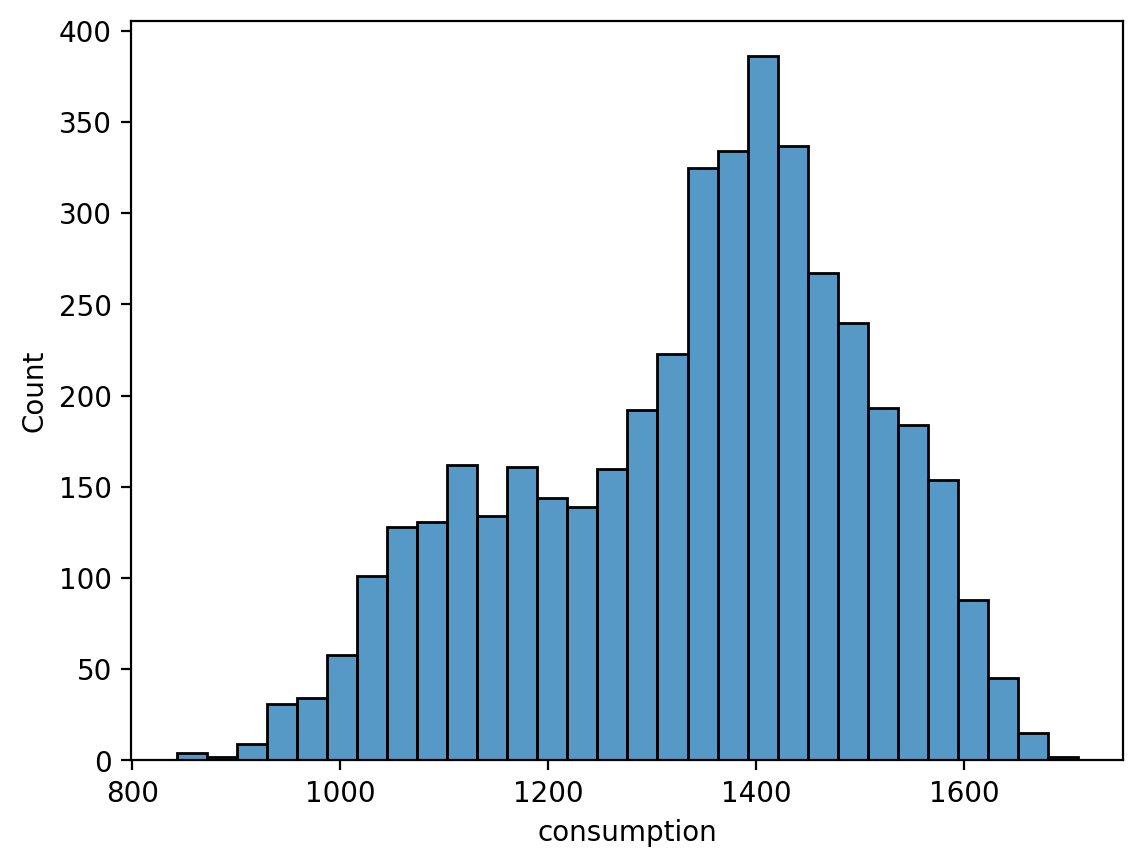

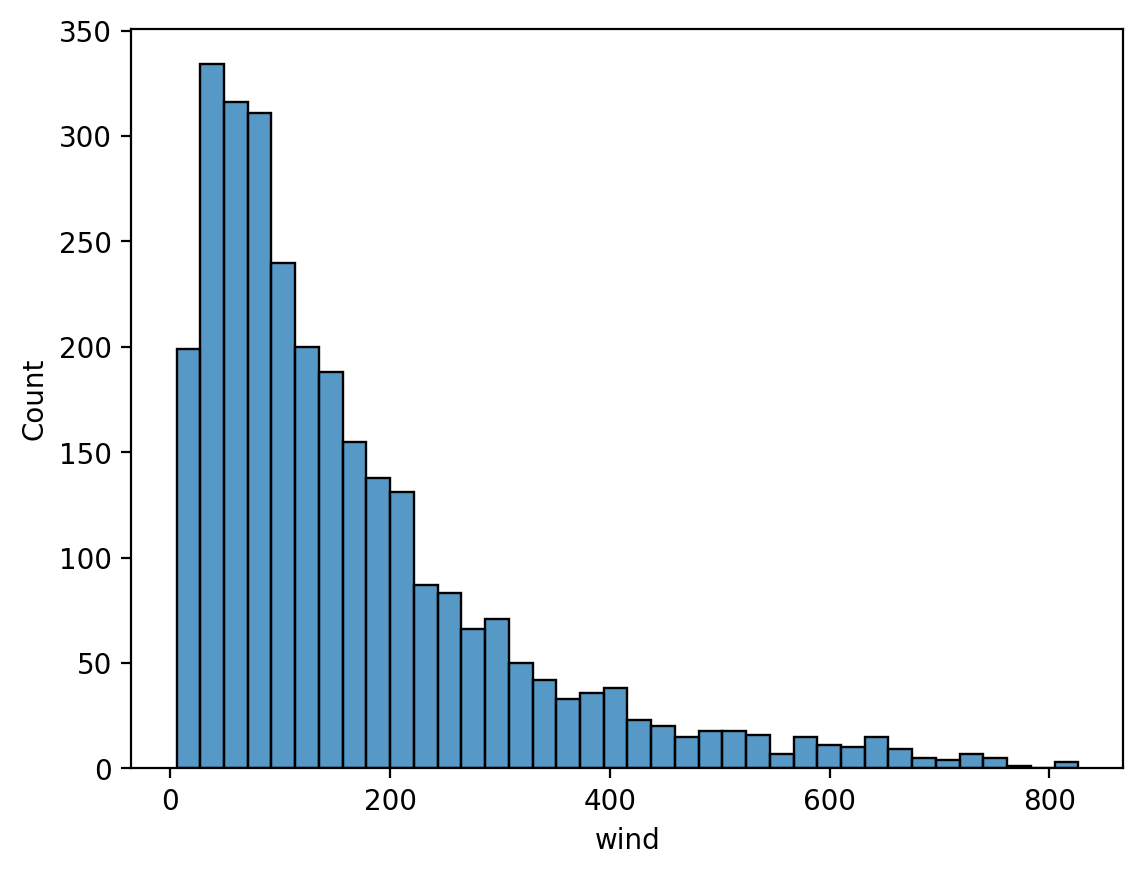

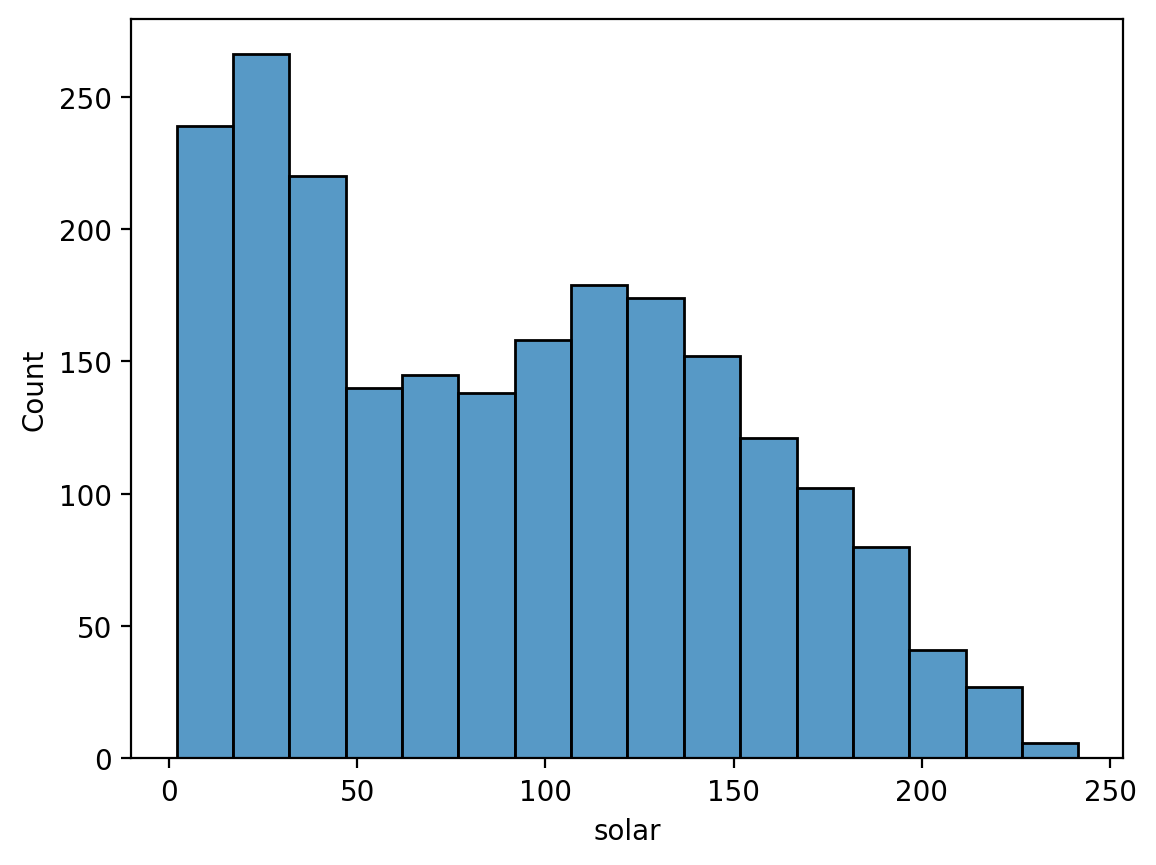

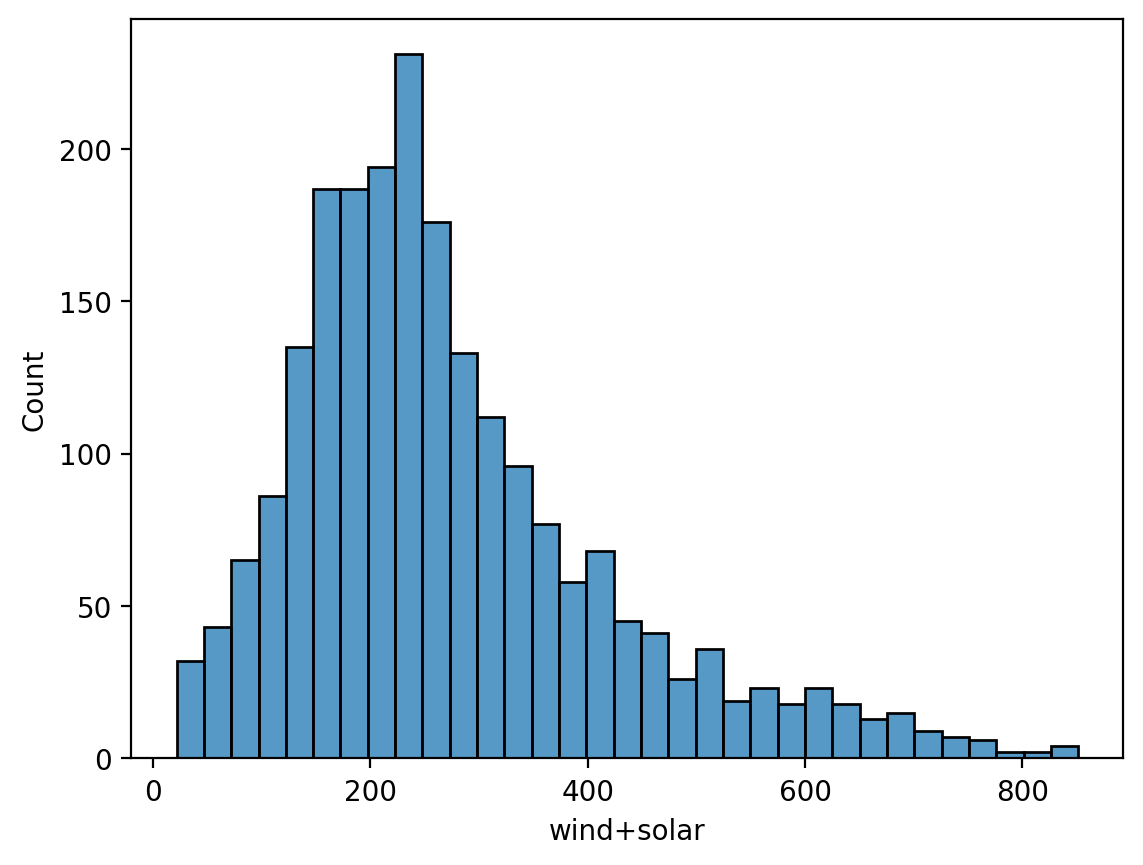

In [17]:
for col in ops.columns[1:]:
    sns.histplot(ops[col])
    plt.show()

3. Set the index to be the datetime variable.

In [18]:
ops = ops.set_index('date').sort_index()

4. Add a month and a year column to your dataframe.

In [19]:
ops['month'] = ops.index.month
ops['year'] = ops.index.year
ops.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [20]:
# find gaps in dates columns
expected_range = pd.date_range(start=ops.index.min(), end=ops.index.max())
expected_range.difference(ops.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

5. Fill any missing values

<Axes: xlabel='date', ylabel='wind'>

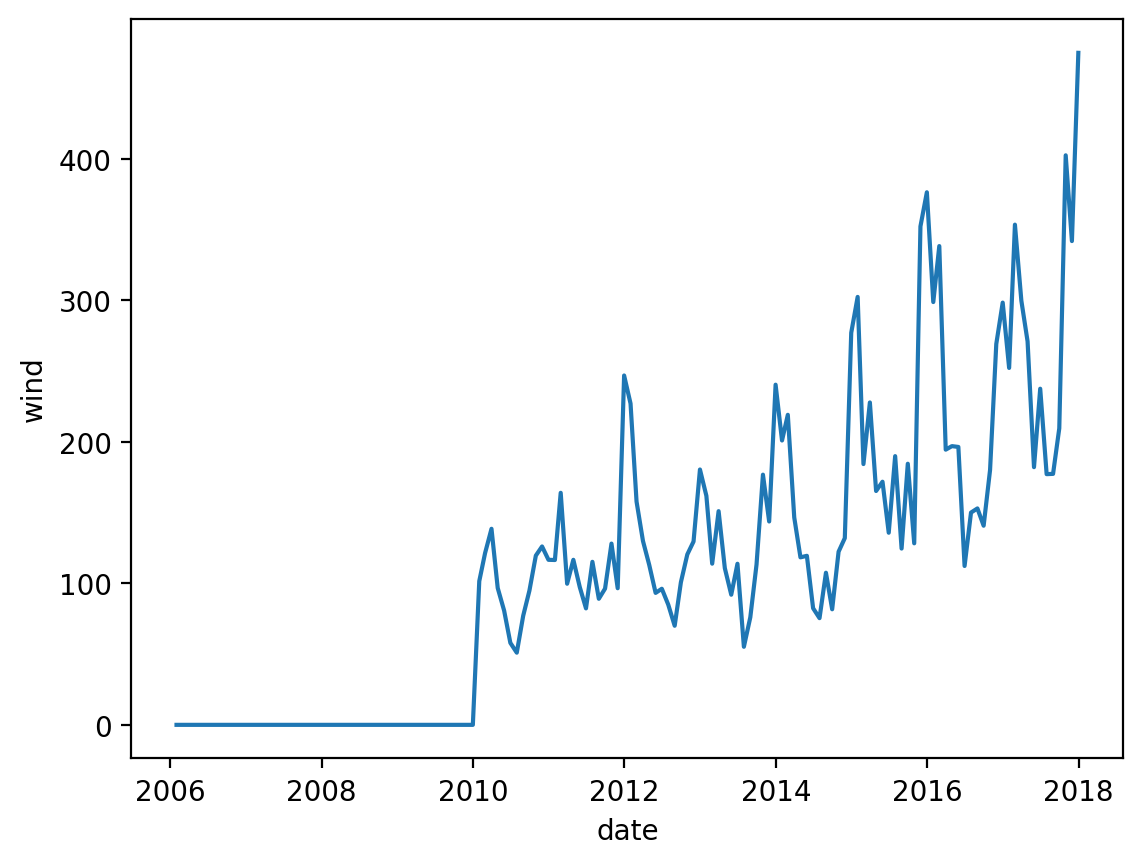

In [40]:
sns.lineplot(ops['wind'].resample('M').mean())

<Axes: xlabel='date', ylabel='solar'>

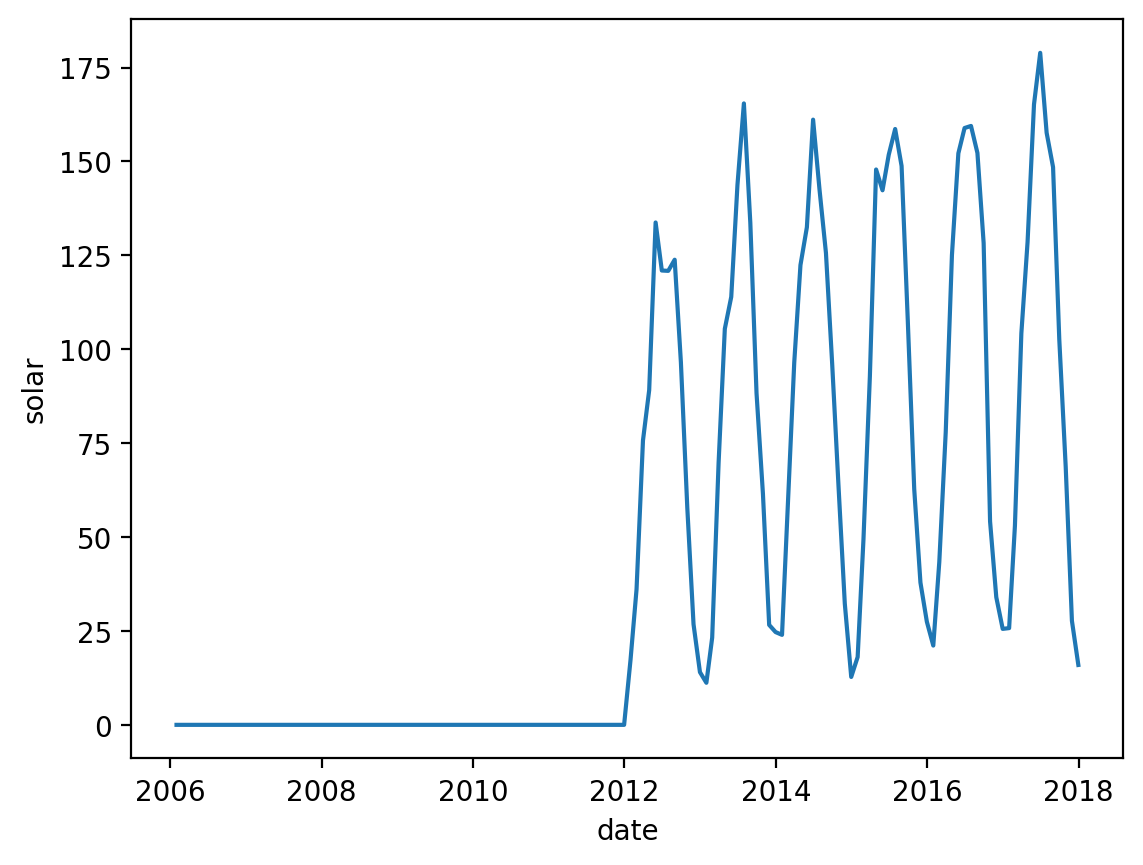

In [41]:
sns.lineplot(ops['solar'].resample('M').mean())

<Axes: xlabel='date', ylabel='wind+solar'>

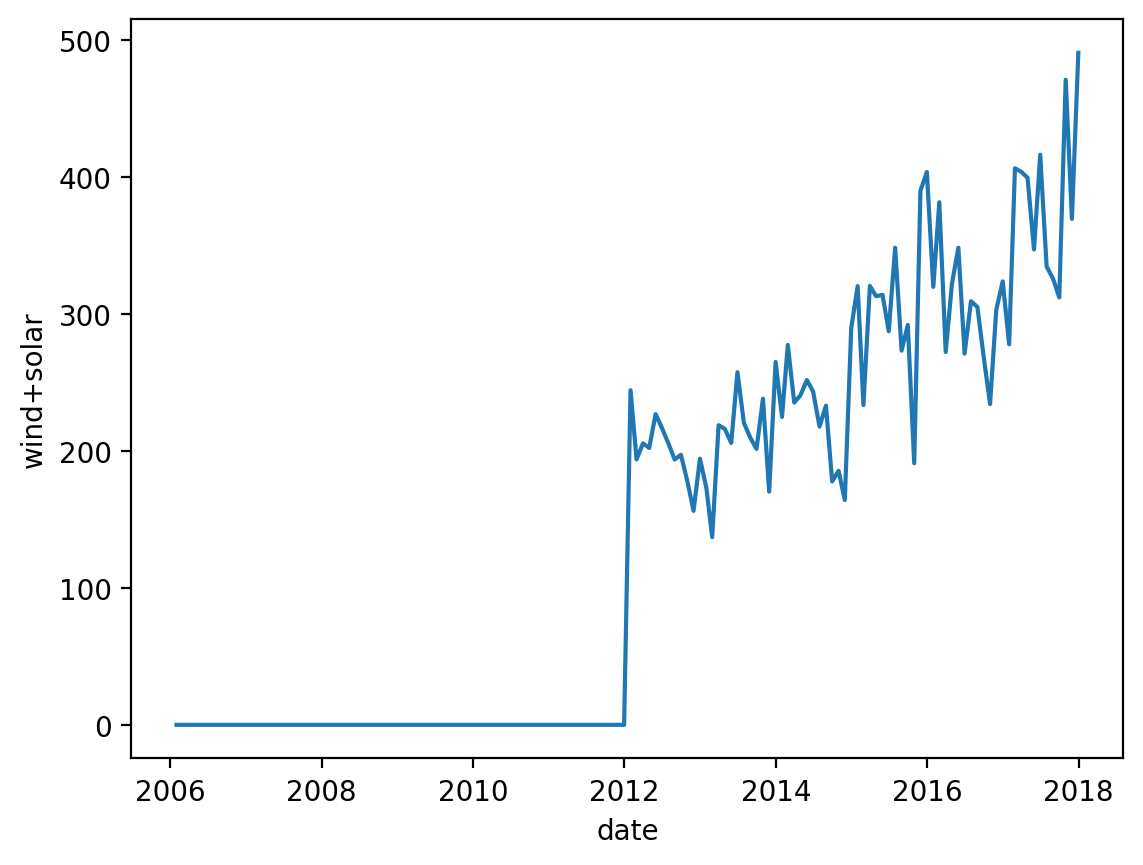

In [42]:
sns.lineplot(ops['wind+solar'].resample('M').mean())

In [39]:
ops = ops.fillna(0)

<Axes: xlabel='date', ylabel='wind'>

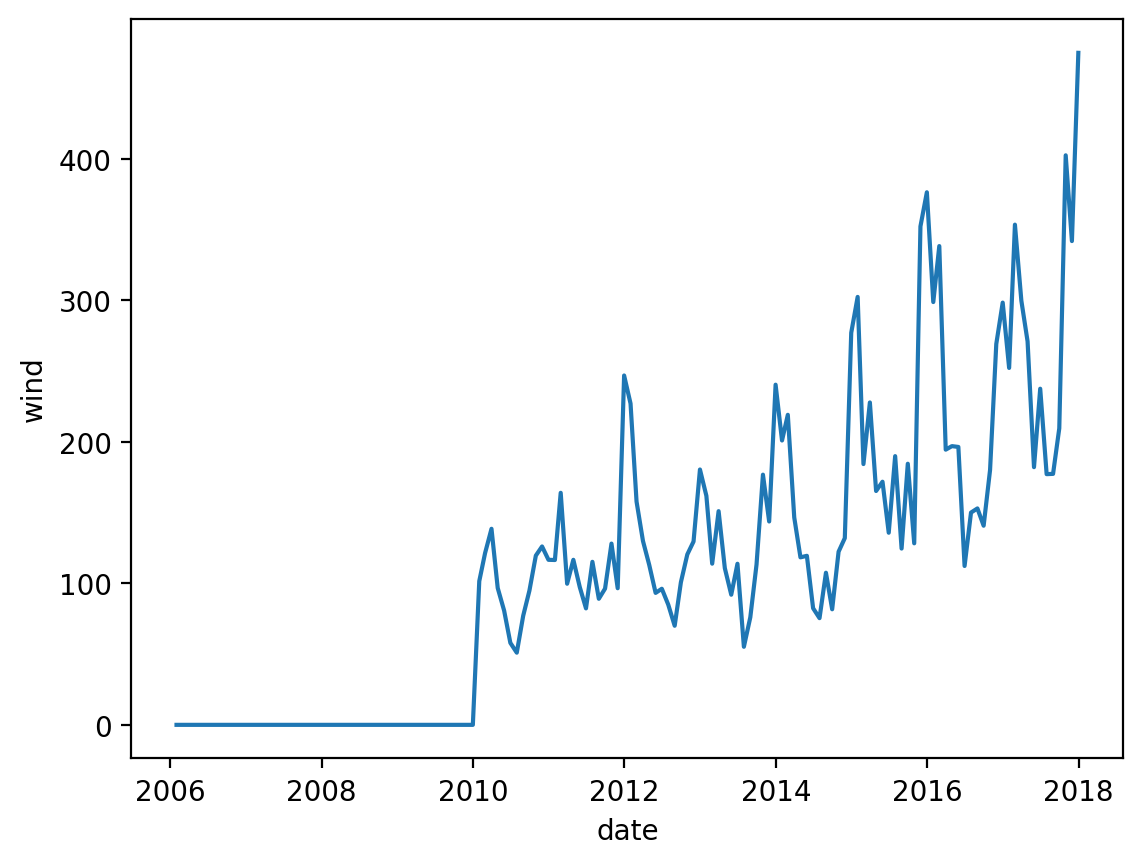

In [40]:
sns.lineplot(ops['wind'].resample('M').mean())

<Axes: xlabel='date', ylabel='solar'>

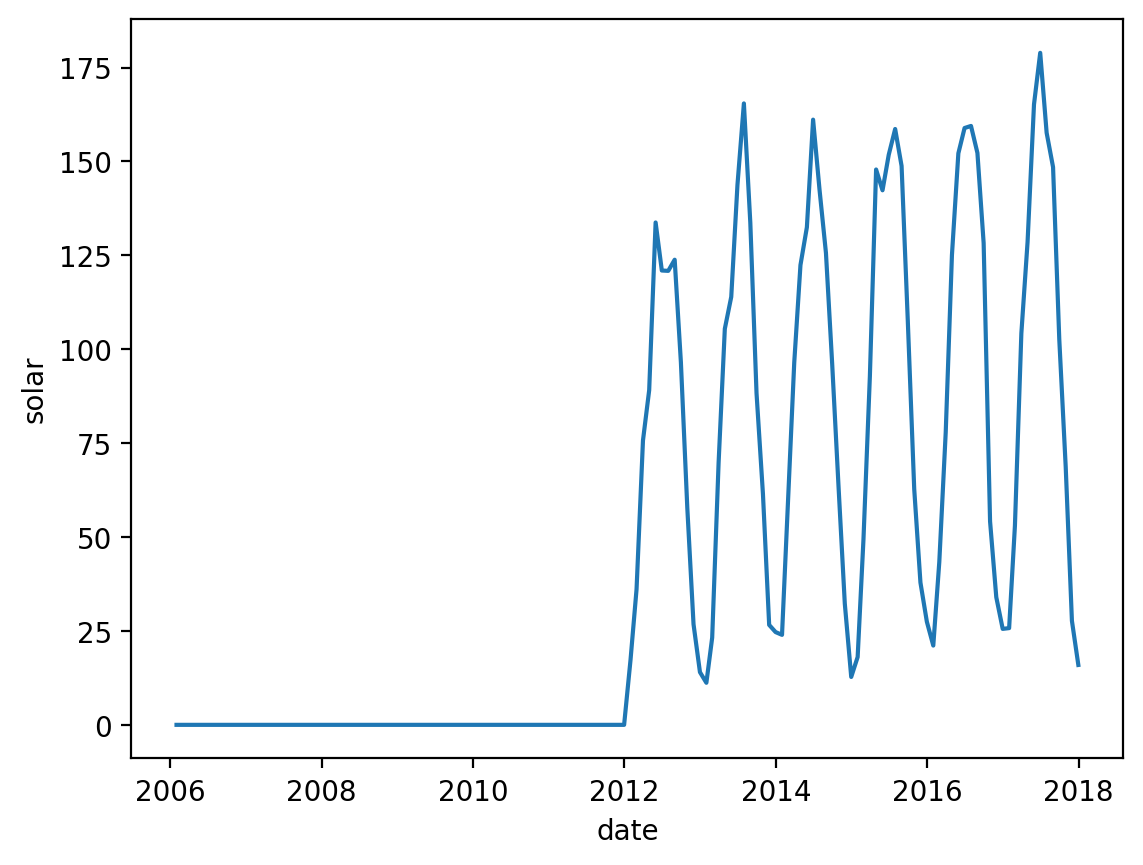

In [41]:
sns.lineplot(ops['solar'].resample('M').mean())

<Axes: xlabel='date', ylabel='wind+solar'>

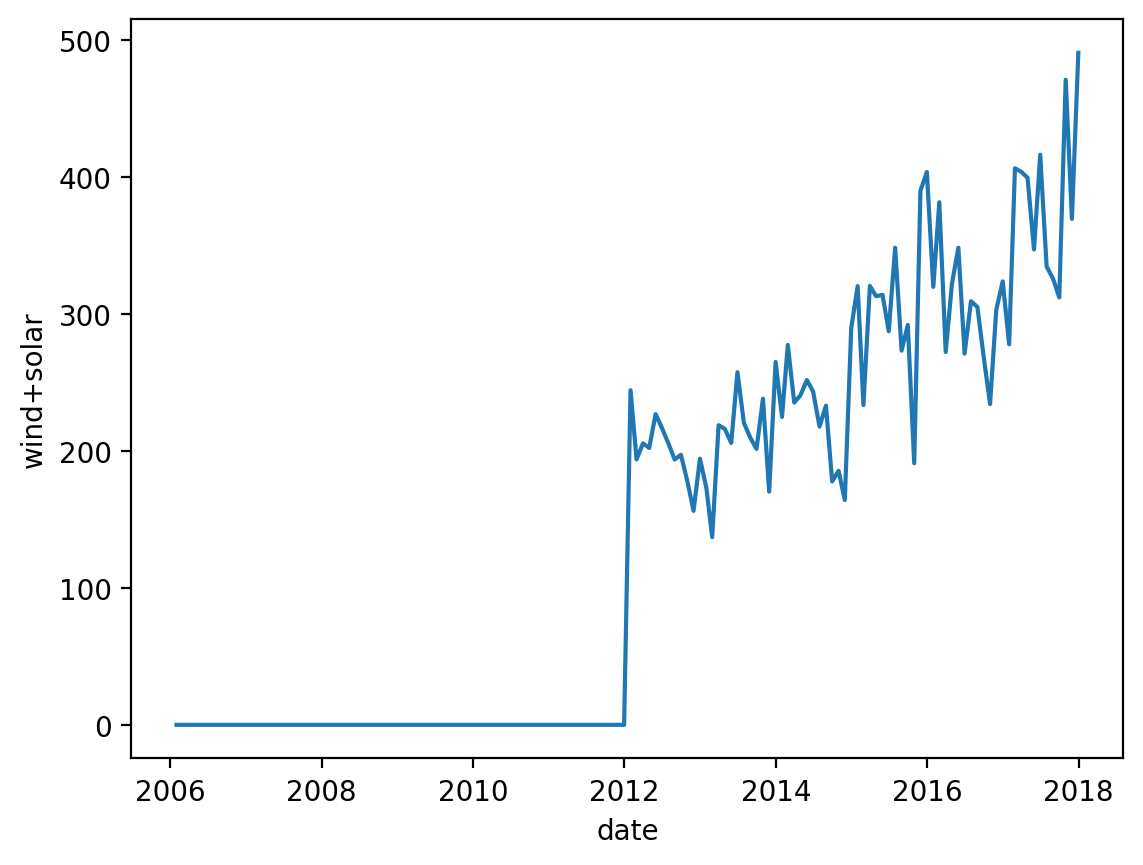

In [42]:
sns.lineplot(ops['wind+solar'].resample('M').mean())

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results

In [44]:
def prep_ops_data(ops_data = a.acquire_ops_data()):
    
    # convert all columns to lowercase
    ops_data.columns = [col.lower() for col in ops_data.columns]
    
    # convert date to datetime index
    ops['date'] = ops['date'].astype('datetime64')
    ops = ops.set_index('date').sort_index()
    
    # add month and year column
    ops['month'] = ops.index.month
    ops['year'] = ops.index.year
    
    # impute 0 for missing values
    ops = ops.fillna(0)
    
    return ops